


### Задача:
Рассмотрим функцию $  f(x) = 3x^2 + 2x + 1 $ на интервале $[1, 4]$.
Вычислите определённый интеграл функции $ f(x) $ на заданном интервале




In [135]:
import numpy as np
import scipy.integrate

def f1(x):
    return 3*x*x + 2*x+1

integral = scipy.integrate.quad(f1, 1, 4)
print(integral)

(80.99999999999999, 8.992806499463766e-13)


### Задача:
Найдите градиент функции $x^2+y^2$ в точке $(1,2)$

In [132]:
import numpy as np
from scipy.optimize import approx_fprime

def func(x):
    # Пример функции: f(x, y) = x^2 + y^2
    return x[0]**2 + x[1]**2

# Точка, в которой мы хотим найти градиент
x = np.array([1.0, 2.0])

# Вычисление градиента
grad = approx_fprime(x, func, epsilon=1e-6) 

print("Градиент функции в точке", x, ":", grad)

Градиент функции в точке [1. 2.] : [2.000001 4.000001]



### Задача:
Градиентный спуск — это итерационный метод оптимизации, который используется для поиска локального минимума дифференцируемой функции. Идея метода заключается в том, чтобы на каждом шаге двигаться в направлении наискорейшего убывания функции, которое определяется отрицательным градиентом функции в текущей точке.

В математической записи, алгоритм градиентного спуска можно представить следующим образом. Пусть $ f: \mathbb{R}^n \rightarrow \mathbb{R} $ — функция, которую мы хотим минимизировать. На каждом шаге $ k $ мы обновляем вектор параметров $ \mathbf{x} $ следующим образом:

$
\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \nabla f(\mathbf{x}_k),
$

где:
- $ \mathbf{x}_k $ — вектор параметров на шаге \( k \),
- $ \alpha $ — положительное число, называемое скоростью обучения,
- $ \nabla f(\mathbf{x}_k) $ — градиент функции $ f $ в точке $ \mathbf{x}_k $.

Скорость обучения $ \alpha $ контролирует размер шага, с которым алгоритм движется в направлении отрицательного градиента. Правильный выбор скорости обучения критически важен для сходимости алгоритма градиентного спуска к локальному минимуму.

Этот процесс повторяется до тех пор, пока изменения в векторе параметров $ \mathbf{x} $ или значение функции $ f $ не станут достаточно малыми, или пока не будет достигнуто максимальное количество итераций.

Напишите функцию, которая по коэф. $a, b, c$ и начальной точке $x$ возвращает точку минимума у параболы

In [26]:
def gradient_descent(a, b, c, current_x): 
    n_iter = 500
    gradient = lambda v: a*2*v + b
    learn_rate = 0.01
    x = [[0]*0 for i in range(n_iter)]
    for i in range(n_iter):
        x[i].append(current_x)
        x[i].append(a*current_x**2+b*current_x+c)
        diff = -learn_rate * gradient(current_x)
        current_x += diff
    return x  # возвращаем минимальное значение x 

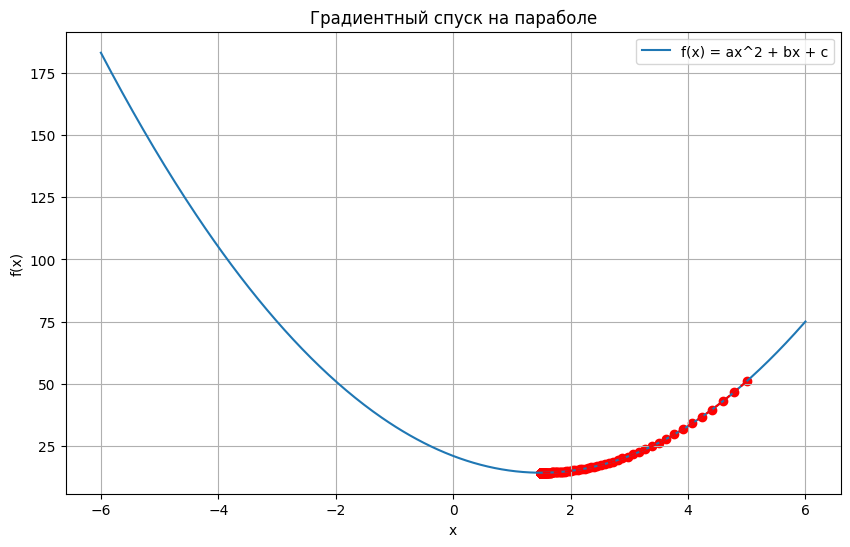

In [37]:
import matplotlib.pyplot as plt
initial_x = 5
a, b, c = 3, -9, 21
history = gradient_descent(a, b, c, initial_x)
# визуализация
x_history, y_history = zip(*history)
x = np.linspace(-initial_x - 1, initial_x + 1, 400)
y = a*x**2 + b*x + c
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = ax^2 + bx + c')
plt.scatter(x_history, y_history, color='red')
plt.plot(x_history, y_history, color='red', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Градиентный спуск на параболе')
plt.grid(True)
plt.show()


### Задача:
Используйте функцию minimize из библиотеки SciPy для поиска минимума функции Розенброка и Химмельблау

In [39]:
from scipy.optimize import minimize
import numpy as np

# Функция Розенброка
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

x0 = np.array([0.9, 1.2])

# Нахождение минимума функции Розенброка
result_rosenbrock = minimize(rosenbrock, x0, method='BFGS', options={'disp':True})

# Вывод результата
print("Минимум функции Розенброка:")
print("Найденное значение переменных:", result_rosenbrock.x)
print("Значение функции в найденной точке:", result_rosenbrock.fun)
print()

# Функция Химмельблау
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

x0_1 = np.array([1, 4])

# Нахождение минимума функции Химмельблау
result_himmelblau = minimize(himmelblau, x0_1, method='BFGS', options={'disp':True})

# Вывод результата
print("Минимум функции Химмельблау:")
print("Найденное значение переменных:", result_himmelblau.x)
print("Значение функции в найденной точке:", result_himmelblau.fun)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 57
         Gradient evaluations: 19
Минимум функции Розенброка:
Найденное значение переменных: [0.99999569 0.99999137]
Значение функции в найденной точке: 1.8597119158698766e-11

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 39
         Gradient evaluations: 13
Минимум функции Химмельблау:
Найденное значение переменных: [2.99999996 2.00000001]
Значение функции в найденной точке: 4.380801853696796e-14
